In [36]:
import sys 
import numpy
import pandas 
import matplotlib 
import seaborn 
import scipy
import sklearn


print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('MatPlotLib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('SciPy: {}'.format(scipy.__version__))
print('SkLearn: {}'.format(sklearn.__version__))

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Python: 3.7.5 (default, Nov  1 2019, 02:16:38) 
[Clang 10.0.0 (clang-1000.11.45.5)]
Numpy: 1.17.4
Pandas: 0.25.3
MatPlotLib: 3.1.2
Seaborn: 0.9.0
SciPy: 1.3.3
SkLearn: 0.22


In [37]:
# load dataset from the csv file using pandas

# dataset can be retrieved from: https://www.kaggle.com/mlg-ulb/creditcardfraud
data = pd.read_csv('creditcard.csv')

In [38]:
# explore the data
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [39]:
print(data.shape)

(284807, 31)


In [40]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
# sampling dataset
# data = data.sample(frac = 0.1, random_state = 1)
# print(data.shape)

(28481, 31)


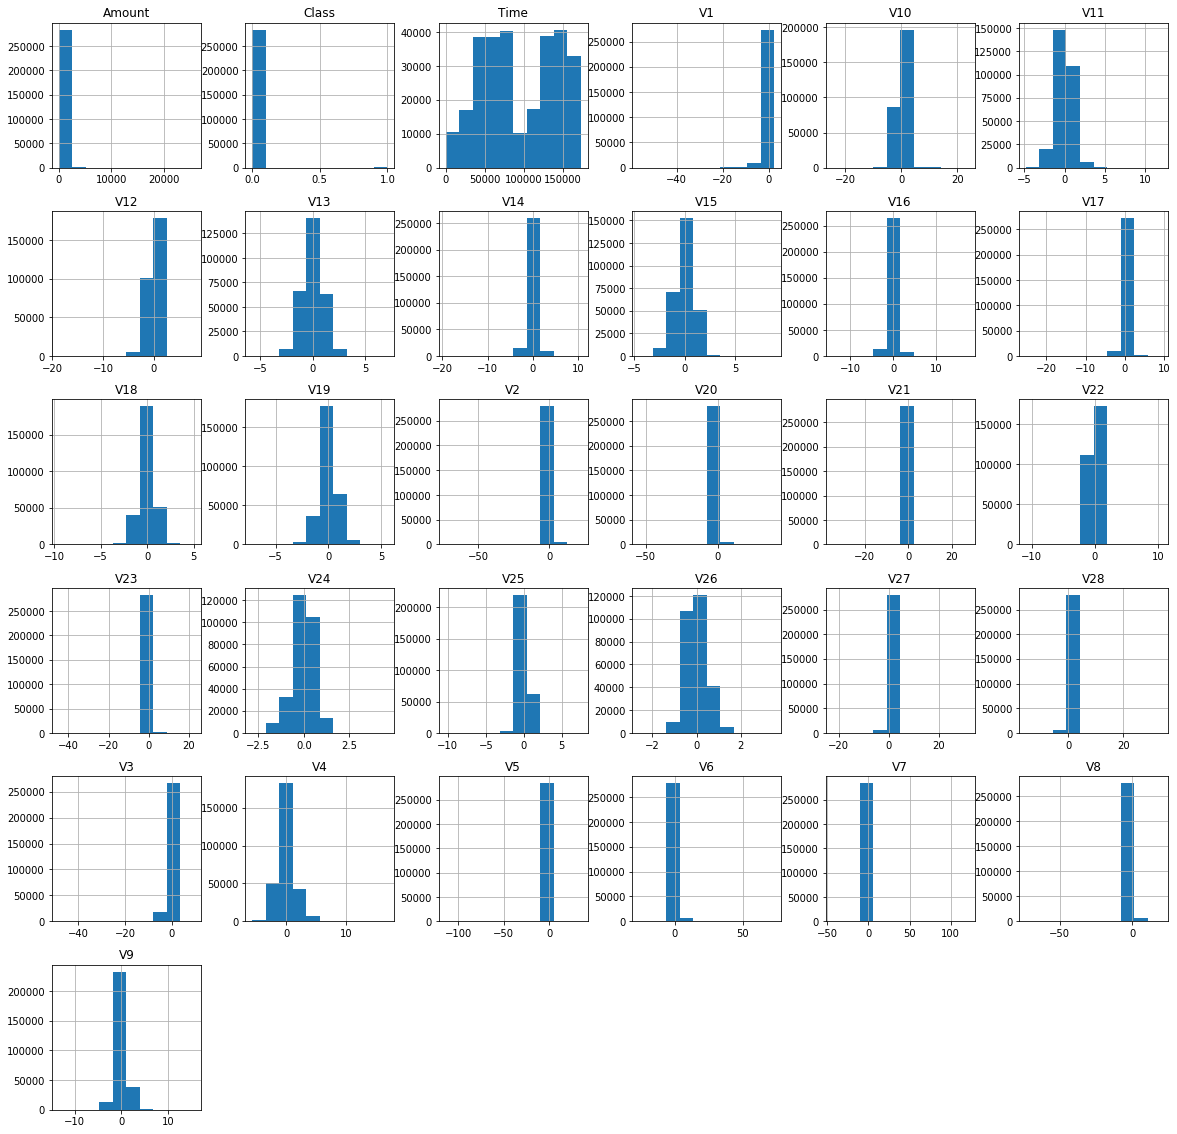

In [41]:
# plot histogram of each parameter

data.hist(figsize = (20,20))
plt.show()

In [42]:
# determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


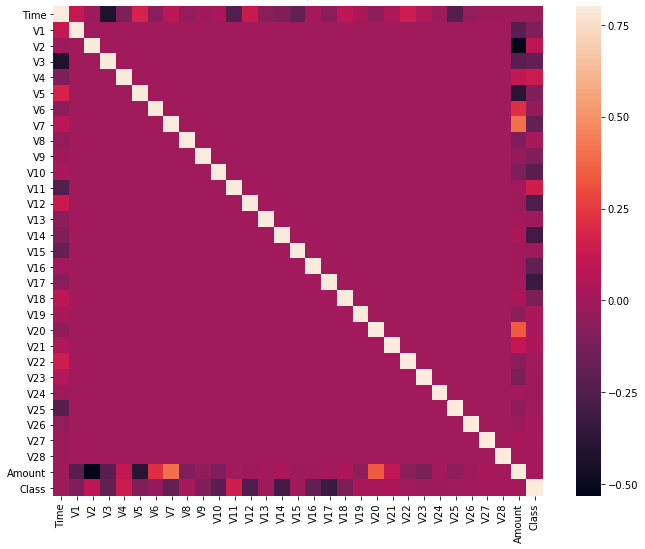

In [43]:
# correlation matrix
cormat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(cormat, vmax = .8, square = True)

In [44]:
# get all the columns from the DataFrame
columns = data.columns.tolist()

# filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# store the variables we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)


(284807, 30)
(284807,)


In [45]:

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor 

# anomaly detection methods
# Isolation Forest
# Local Outlier Factor

# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_fraction)
}

In [46]:
# fit the model 
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

